# Title: Make_cmatrix
### Author: Mathieu Giguere

Brief: Uses the output of a machine learning model to make a confusion matrix.

Preconditions: Needs '{drug}_ML_orthologs_results.csv'

### Importing modules and packages

In [1]:
import pandas as pd
import numpy as np
np.bool = np.bool_
np.int = np.int_
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import glob
import os

### Define the antifungal drug used.

Choices are : 'caspofungin', 'anidulafungin', 'micafungin'

In [2]:
drug = 'caspofungin'

### Read the ML output file.

In [3]:
df = pd.read_csv(f'{drug}/{drug}_ML_orthologs_results.csv')

y_test = df['y_test'].tolist()

y_pred = df['y_pred'].tolist()

In [4]:
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matthews correlation coefficient
mat = matthews_corrcoef(y_test, y_pred)
print("Mat:", mat)

Accuracy: 0.9486607142857143
Mat: 0.8973214285714286


### Create the confusion matrix

In [5]:
cmatrix = confusion_matrix(y_test, y_pred)

cmatrix

array([[31,  1],
       [ 1, 13]])

### Plot Confusion Matrix

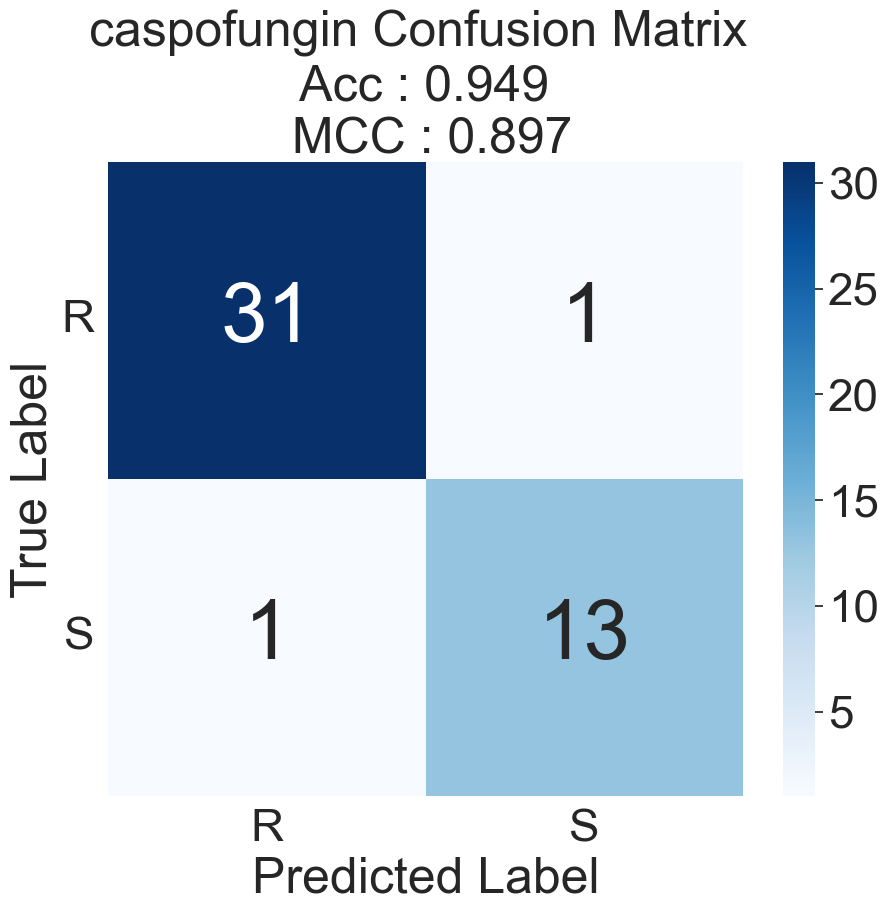

In [6]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 10))
sns.set(font_scale=3)
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['R', 'S'], yticklabels=['R', 'S'], annot_kws={"size": 60})
plt.yticks(rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'{drug} Confusion Matrix \n Acc : {accuracy:.3f} \n MCC : {mat:.3f}')
plt.tight_layout()
plt.savefig(f'{drug}/{drug}_Conf_matrix.svg')
plt.show()